In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Import packages

In [48]:
import matplotlib.pyplot as plt  #Graphics
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.datasets import mnist
from subprocess import call
from sklearn.tree import export_graphviz
from IPython.display import Image
%matplotlib inline

Load Data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Reshape matrices to 784-length vectors for training
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)


In [50]:
def print_image(df):
    temp = df.reshape(28,28).astype('uint8')
    plt.imshow(temp)

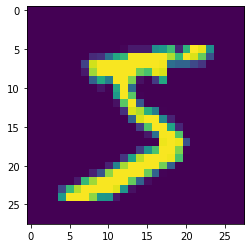

In [51]:
print_image(x_train[0])


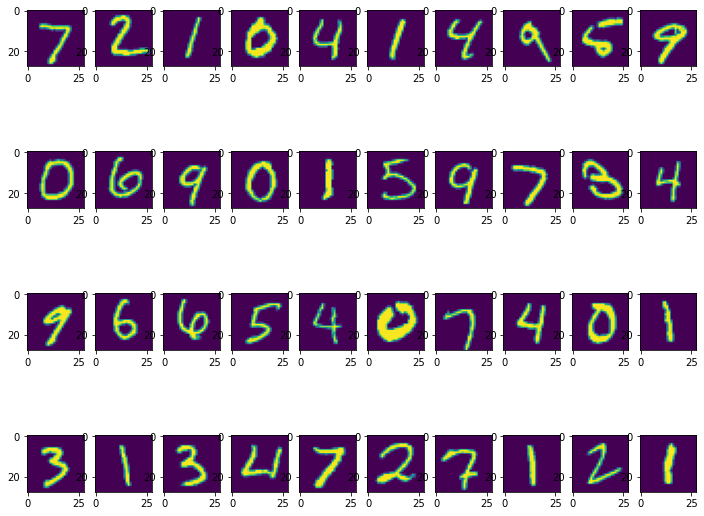

In [53]:
plt.figure(figsize=(12,10))
for i in range(40):
    plt.subplot(4, 10, i+1)
    print_image(x_test[i])

In [55]:
#training random Forest
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
pred=rf.predict(x_test)
print ("Classification Report")
print(classification_report(y_test, pred))
print ("Confusion Report")
print(confusion_matrix(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.95      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Report
[[ 971    0    0    1    0    2    2    1    3    0]
 [   0 1123    3    3    0    2    2    0    1    1]
 [   6    0 1000    6    3    0    3    8    6    0]
 [   1    0    6  977    0    8    0    9  

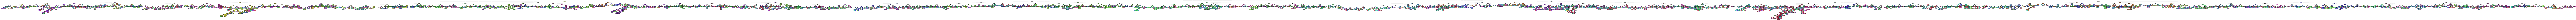

In [57]:
# Export as dot file
export_graphviz(rf.estimators_[0],
                out_file='tree.dot',
                rounded=True, proportion=False,
                precision=2, filled=True)

# Convert to png
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=6000'])

# Display in jupyter notebook

Image(filename='tree.png')